In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
Us

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_validation_path = 'Fruits_Vegetables/validation'

In [6]:
img_width = 180
img_height = 180
data_train  = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle = True,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False 
)

Found 3115 files belonging to 36 classes.


In [67]:
data_category = data_train.class_names
data_category

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [ ]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_validation_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False 
    )

Found 351 files belonging to 36 classes.


In [13]:
data_test  =tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle = False,
    image_size = (img_width,img_height),
    batch_size = 32,
    validation_split = False
)

Found 359 files belonging to 36 classes.


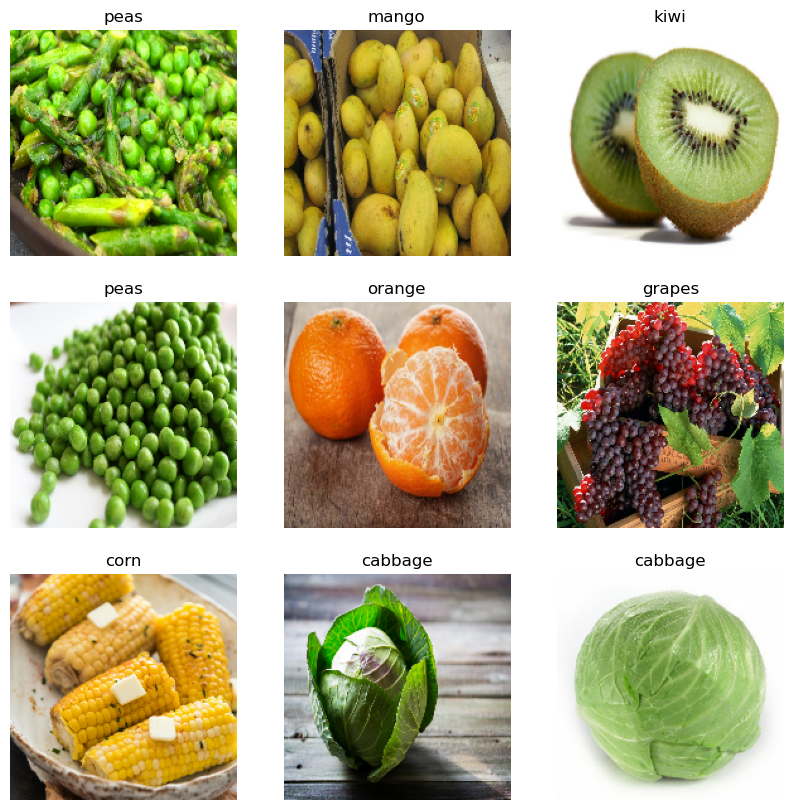

In [26]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_category[labels[i]])
        plt.axis('off')

In [30]:
from tensorflow.keras.models import Sequential

In [32]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [39]:
model = Sequential([
    layers.Rescaling(1./255,),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_category))
])

In [40]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [41]:
epochs_size = 25
history = model.fit(data_train,validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 51s 502ms/step - accuracy: 0.1030 - loss: 3.3483 - val_accuracy: 0.4274 - val_loss: 2.2205
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 415ms/step - accuracy: 0.3265 - loss: 2.3431 - val_accuracy: 0.5527 - val_loss: 1.5630
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 418ms/step - accuracy: 0.4986 - loss: 1.7617 - val_accuracy: 0.7607 - val_loss: 0.9022
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 420ms/step - accuracy: 0.6745 - loss: 1.1119 - val_accuracy: 0.8917 - val_loss: 0.5903
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 422ms/step - accuracy: 0.8299 - loss: 0.6216 - val_accuracy: 0.9145 - val_loss: 0.4098
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 434ms/step - accuracy: 0.9156 - loss: 0.3340 - val_accuracy: 0.9231 - val_loss: 0.5365
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 35s 352ms/step - accuracy: 0.9371 - loss: 0.2770 - val_accuracy: 0.9430 - val_loss: 0.4077
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 32s 325ms/step - accuracy: 0.9567 - loss: 0.1653 - val_accu

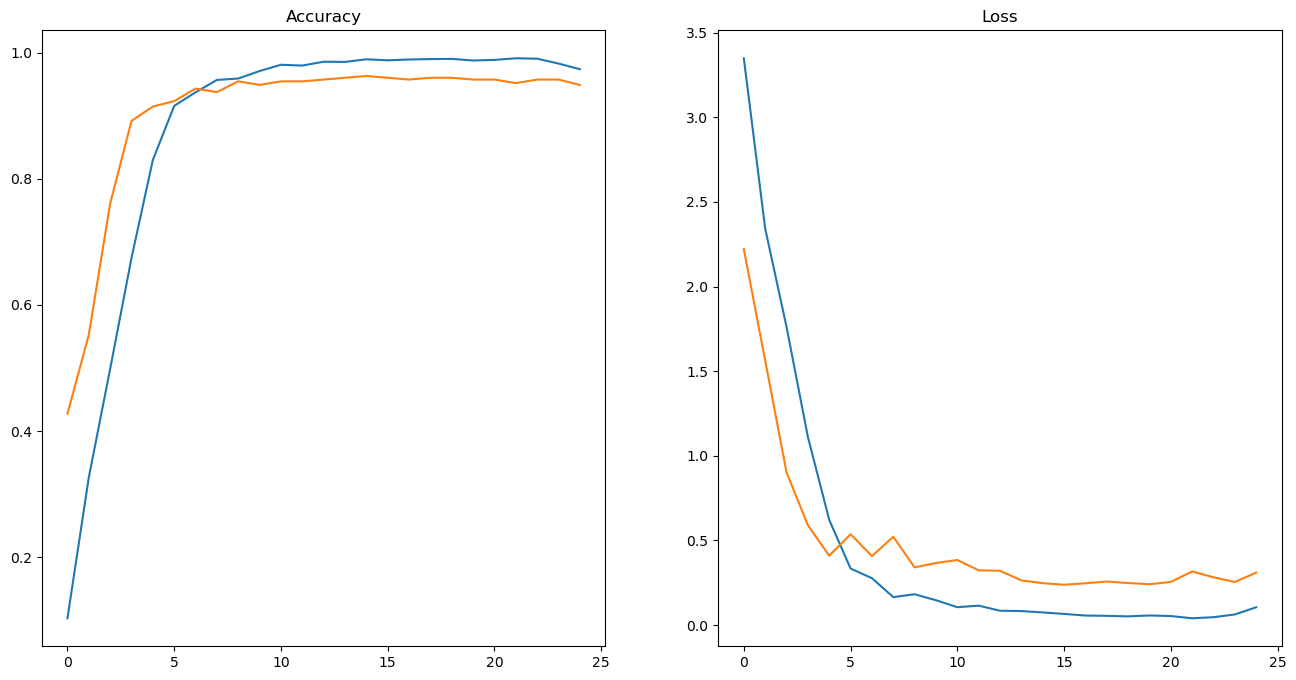

In [50]:
epochs_range = range(epochs_size)
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label='Training Accuracy')
plt.plot(epochs_range,history.history['val_accuracy'],label="Validation Accuracy")
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label='Training Loss')
plt.plot(epochs_range,history.history['val_loss'],label="Validation Loss")
plt.title('Loss')
plt.show()


In [63]:
image = 'Image_6.JPG'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat = tf.expand_dims(img_arr,0)

In [64]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [65]:
score = tf.nn.softmax(predict)
print('The image is {} with accuracy of {:0.2f}'.format(data_category[np.argmax(score)],np.max(score)*100))

The image is apple with accuracy of 100.00


In [66]:
model.save('Image_classifier.keras')